## Imports

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

%matplotlib inline

In [283]:
from scipy.stats import chi2_contingency
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import binom

In [284]:
clean_demo = pd.read_csv('clean_demo.csv')

# Muestra las primeras filas del DataFrame
print(clean_demo.head())

   client_id  since_years  since_months   age   gender  n_accounts    balance  \
0     836976          6.0          73.0  60.5  Unknown         2.0   45105.30   
1    2304905          7.0          94.0  58.0  Unknown         2.0  110860.30   
2    1439522          5.0          64.0  32.0  Unknown         2.0   52467.79   
3    1562045         16.0         198.0  49.0        M         2.0   67454.65   
4    5126305         12.0         145.0  33.0        F         2.0  103671.75   

   calls_6_mnth  logons_6_mnth  
0           6.0            9.0  
1           6.0            9.0  
2           6.0            9.0  
3           3.0            6.0  
4           0.0            3.0  


In [285]:
clean_experiment = pd.read_csv('clean_experiment.csv')

# Muestra las primeras filas del DataFrame
print(clean_experiment.head())

   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
3    1982004      Test
4    9294070   Control


In [286]:
concat_df = pd.read_csv('concat_web_df.csv')
print(concat_df.head())

   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  2017-04-17 15:27:07  
1  2017-04-17 15:26:51  
2  2017-04-17 15:19:22  
3  2017-04-17 15:19:13  
4  2017-04-17 15:18:04  


In [287]:
merged_test = pd.read_csv('merged_test.csv')
print(merged_test.head())

   client_id  since_years  since_months   age   gender  n_accounts    balance  \
0     836976          6.0          73.0  60.5  Unknown         2.0   45105.30   
1    1439522          5.0          64.0  32.0  Unknown         2.0   52467.79   
2    1562045         16.0         198.0  49.0        M         2.0   67454.65   
3     388801         30.0         361.0  57.5        M         5.0  522498.72   
4    8198645         15.0         189.0  54.5        F         2.0  382303.83   

   calls_6_mnth  logons_6_mnth  
0           6.0            9.0  
1           6.0            9.0  
2           3.0            6.0  
3           1.0            4.0  
4           6.0            9.0  


In [288]:
clean_merged_test = pd.read_csv('clean_merged_test.csv')
print(clean_merged_test.head())

FileNotFoundError: [Errno 2] No such file or directory: 'clean_merged_test.csv'

In [ ]:
merged_control = pd.read_csv('merged_control.csv')
print(merged_control.head())

In [ ]:
clean_merged_control = pd.read_csv('clean_merged_control.csv')
print(clean_merged_control.head())

## Medidas de tendencia central y dispersión para cada tabla 

In [ ]:
clean_demo.columns

Index(['client_id', 'since_years', 'since_months', 'age', 'gender',
       'n_accounts', 'balance', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

### clean_demo

In [ ]:
columns = ['since_years', 'since_months', 'age', 'n_accounts', 'calls_6_mnth','logons_6_mnth', 'balance']

# Calcular la media de cada columna numérica
mean_values = clean_demo[columns].mean()
mean_values
# Calcular la mediana de cada columna numérica
median_values = clean_demo[columns].median()
median_values
# Calcular la moda de cada columna categórica
mode_values = clean_demo[columns].mode().iloc[0]  # Tomar el primer valor de la fila de moda
mode_values
print("Medias:")
print(mean_values)
print("\nMedianas:")
print(median_values)
print("\nModas:")
print(mode_values)

Medias:
since_years          12.052950
since_months        150.659367
age                  46.442240
n_accounts            2.255528
calls_6_mnth          3.382478
logons_6_mnth         5.566740
balance          147445.240641
dtype: float64

Medianas:
since_years         11.0
since_months       136.0
age                 47.0
n_accounts           2.0
calls_6_mnth         3.0
logons_6_mnth        5.0
balance          63332.9
dtype: float64

Modas:
since_years          6.00
since_months        58.00
age                 58.50
n_accounts           2.00
calls_6_mnth         6.00
logons_6_mnth        9.00
balance          31188.62
Name: 0, dtype: float64


In [ ]:
# Calcular la desviación estandart de cada columna numérica

std_values = clean_demo[columns].std()

# Calcular el rango (max - min) de cada columna numérica
range_values = clean_demo[columns].max() - clean_demo[columns].min()

print("Desviaciones Estándar:")
print(std_values)
print("\nValores Mínimos:")
print(clean_demo[columns].min())
print("\nValores Máximos:")
print(clean_demo[columns].max())
print("\nRangos:")
print(range_values)

Desviaciones Estándar:
since_years           6.871819
since_months         82.089854
age                  15.591273
n_accounts            0.534997
calls_6_mnth          2.236580
logons_6_mnth         2.353286
balance          301508.706531
dtype: float64

Valores Mínimos:
since_years          2.00
since_months        33.00
age                 13.50
n_accounts           1.00
calls_6_mnth         0.00
logons_6_mnth        1.00
balance          13789.42
dtype: float64

Valores Máximos:
since_years            62.00
since_months          749.00
age                    96.00
n_accounts              8.00
calls_6_mnth            7.00
logons_6_mnth           9.00
balance          16320040.15
dtype: float64

Rangos:
since_years            60.00
since_months          716.00
age                    82.50
n_accounts              7.00
calls_6_mnth            7.00
logons_6_mnth           8.00
balance          16306250.73
dtype: float64


# Demographics Analysis

### Género

In [ ]:
gender_total= clean_demo['gender'].value_counts()
gender_total

gender
Unknown    24125
M          23724
F          22746
Name: count, dtype: int64

Text(0, 0.5, '')

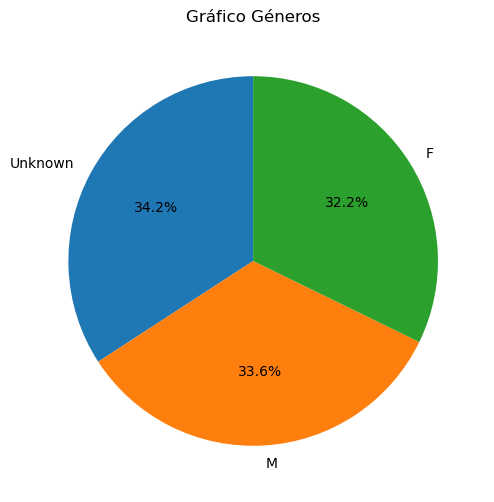

In [ ]:
plt.figure(figsize=(8, 6))
clean_demo['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Gráfico Géneros")
plt.ylabel(None)
# plt.show()

### Edad

In [ ]:
# Identificar los clientes principales por edad
age_total= clean_demo['age'].value_counts()
age_total

age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: count, Length: 165, dtype: int64

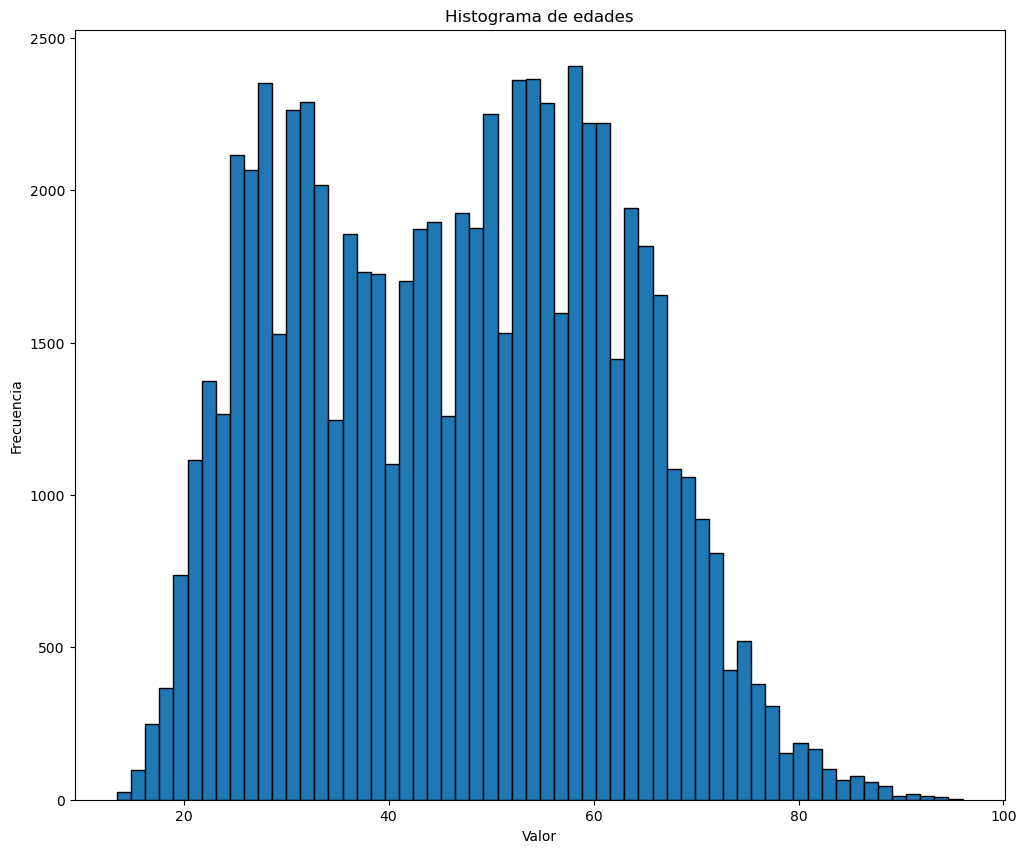

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(clean_demo['age'], bins=60, edgecolor='black')
plt.title("Histograma de edades")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

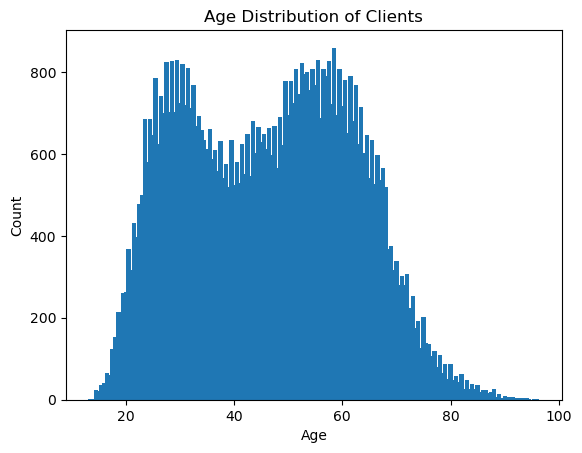

In [ ]:
# Identificar los clientes principales por edad
age_distribution = clean_demo['age'].value_counts().sort_index()
plt.bar(age_distribution.index, age_distribution.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Clients')
plt.show()

### Años de permanencia / Analizar la antigüedad de los clientes


In [ ]:
since_years_total= clean_demo['since_years'].value_counts().sort_values()
since_years_total

since_years
62.0       1
54.0       1
45.0       1
41.0       1
52.0       2
44.0       3
49.0       4
51.0       5
46.0       5
42.0       6
43.0       6
47.0       6
50.0       8
39.0       9
55.0       9
40.0       9
48.0      16
38.0      33
37.0      35
36.0      36
2.0       81
35.0     102
31.0     166
34.0     175
32.0     191
33.0     206
30.0     303
29.0     309
3.0      449
25.0     484
28.0     507
27.0     632
26.0     660
24.0     846
19.0    1153
18.0    1206
23.0    1279
17.0    1373
22.0    1492
20.0    1580
21.0    2257
16.0    2714
10.0    2775
11.0    2920
9.0     3357
13.0    3607
12.0    3631
14.0    3646
8.0     4045
15.0    4564
4.0     4687
7.0     4955
5.0     6955
6.0     7092
Name: count, dtype: int64

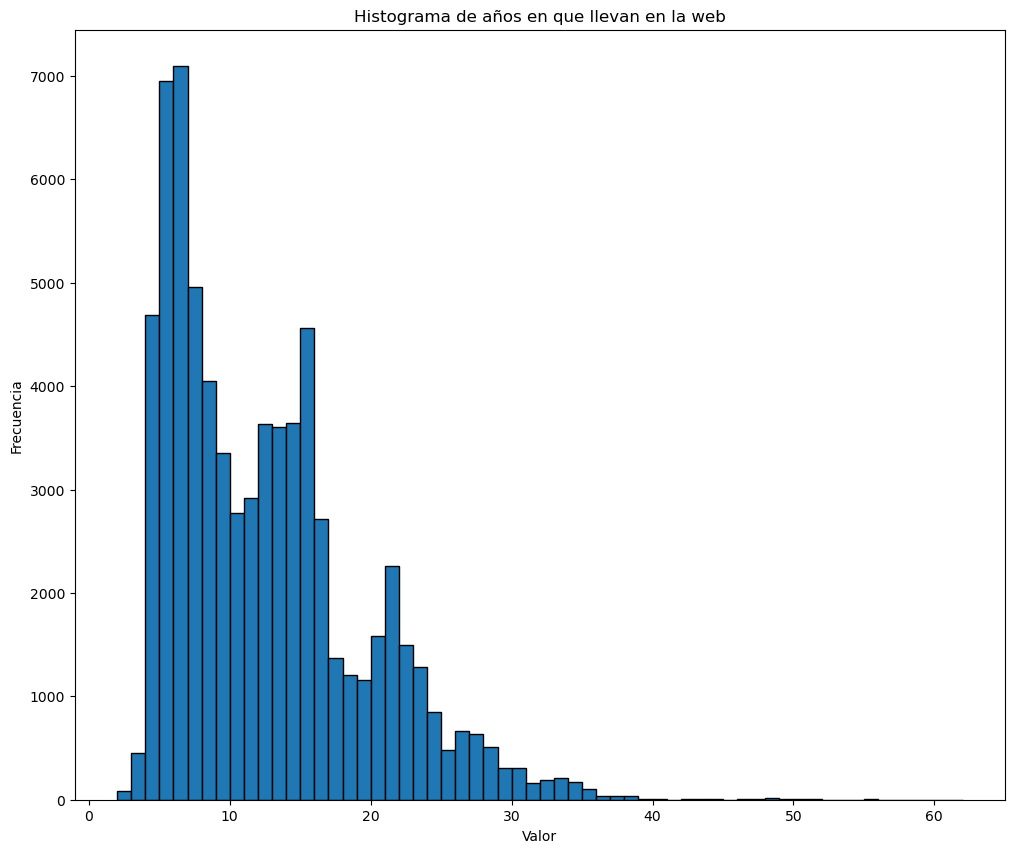

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(clean_demo['since_years'], bins=60, edgecolor='black')
plt.title("Histograma de años en que llevan en la web")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

### Relación entre edad y antigüedad

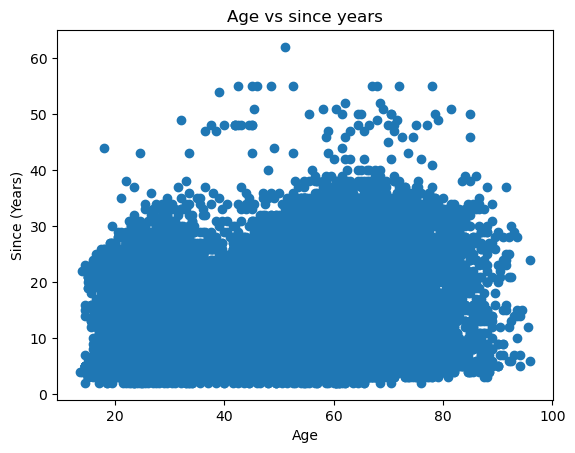

In [ ]:
plt.scatter(clean_demo['age'], clean_demo['since_years'])
plt.xlabel('Age')
plt.ylabel('Since (Years)')
plt.title('Age vs since years')
plt.show()

In [ ]:
since_months_total= clean_demo['since_months'].value_counts()
since_months_total

since_months
58.0     1711
70.0     1404
59.0     1282
71.0     1020
82.0      974
         ... 
655.0       1
564.0       1
526.0       1
532.0       1
480.0       1
Name: count, Length: 482, dtype: int64

### Nº de cuentas

In [ ]:
n_accounts_total= clean_demo['n_accounts'].value_counts()
n_accounts_total

n_accounts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

Text(0, 0.5, '')

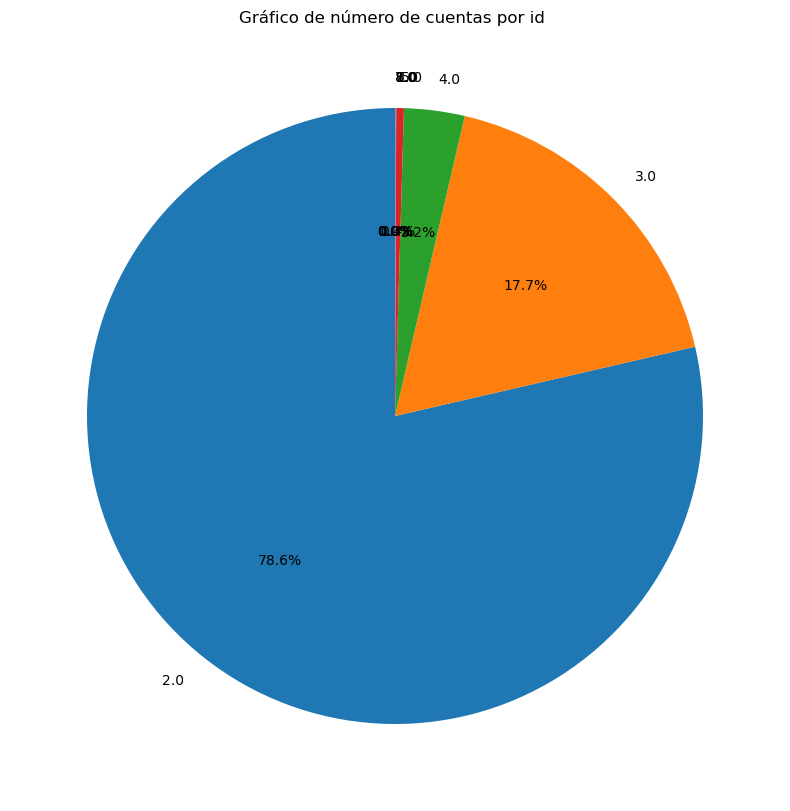

In [ ]:
plt.figure(figsize=(12, 10))
clean_demo['n_accounts'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Gráfico de número de cuentas por id ")
plt.ylabel(None)
# plt.show()

### Nº Cuentas y Edad 

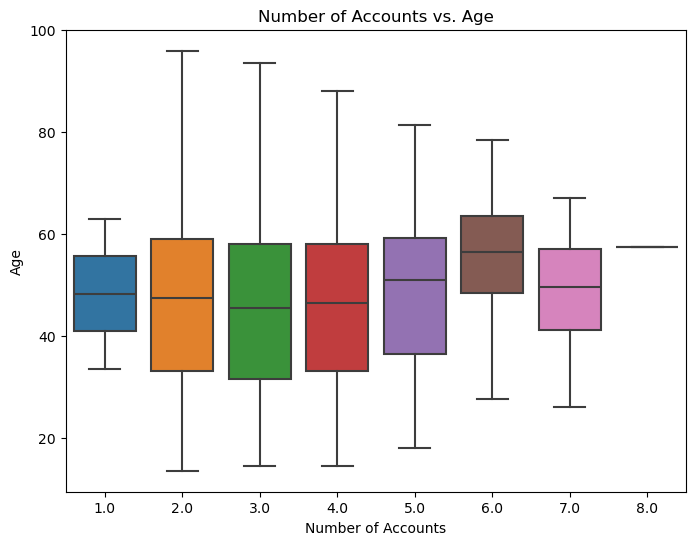

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_demo, x='n_accounts', y='age')
plt.title('Number of Accounts vs. Age')
plt.xlabel('Number of Accounts')
plt.ylabel('Age')
plt.show()

### Nº cuentas- Género

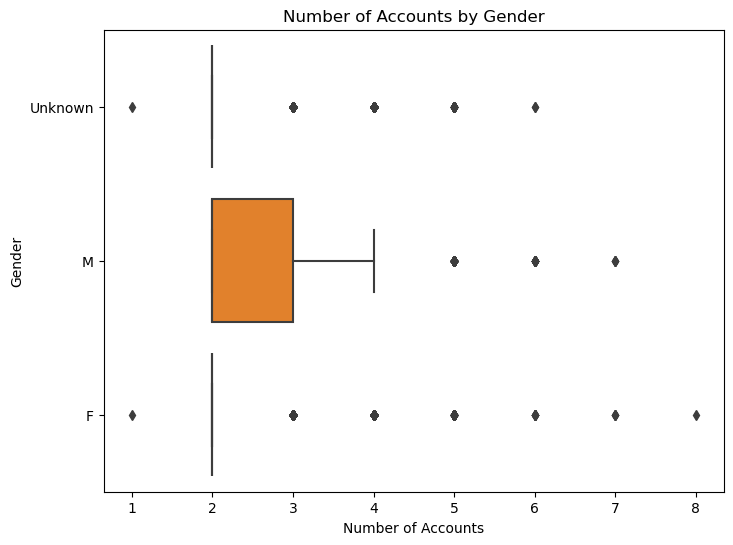

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_demo, x='n_accounts', y='gender')
plt.title('Number of Accounts by Gender')
plt.xlabel('Number of Accounts')
plt.ylabel('Gender')
plt.show()

### LLamadas

In [ ]:
calls_6_mnth_total= clean_demo['calls_6_mnth'].value_counts()
calls_6_mnth_total

calls_6_mnth
6.0    14112
1.0    11016
2.0    10252
3.0     8752
0.0     7732
4.0     7175
5.0     6627
7.0     4929
Name: count, dtype: int64

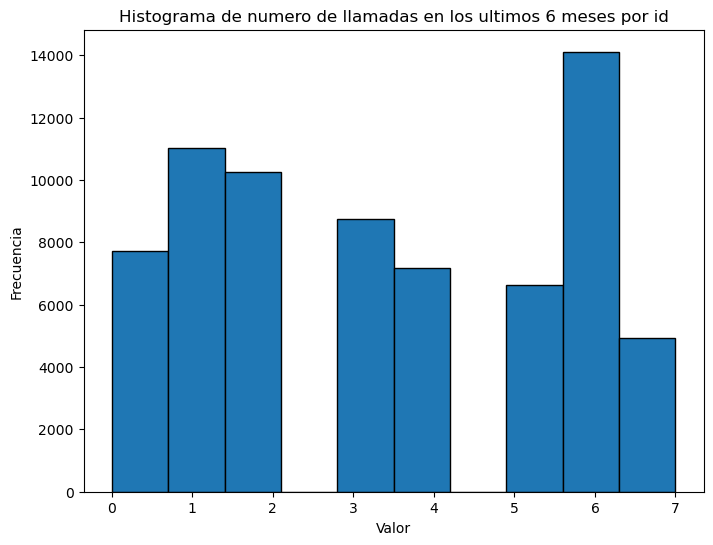

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(clean_demo['calls_6_mnth'], bins=10, edgecolor='black')
plt.title("Histograma de numero de llamadas en los ultimos 6 meses por id")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

### Inicios de sesion / 6 meses

In [ ]:
logons_6_mnth_total= clean_demo['logons_6_mnth'].value_counts()
logons_6_mnth_total

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

### Balance

In [ ]:
balance_total= clean_demo['balance'].value_counts()
balance_total

balance
31188.62     5
29388.51     4
29388.50     3
24953.79     3
29389.11     3
            ..
44102.10     1
33006.07     1
26088.34     1
51203.28     1
157498.73    1
Name: count, Length: 70327, dtype: int64

# Client Behavior Analysis


### Crear un dataframe grupo test:

In [ ]:
# Unir los clientes de tipo test con el dataframe que recoge sus actividades digitales
# Join clients that belong to Test Variation to their digital footprints
df_client_test_digital = pd.merge(df_client_id_test, concat_df, on='client_id', how='inner')
df_client_test_digital

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
177842,6334360,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
177843,6334360,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
177844,6334360,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
177845,6334360,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


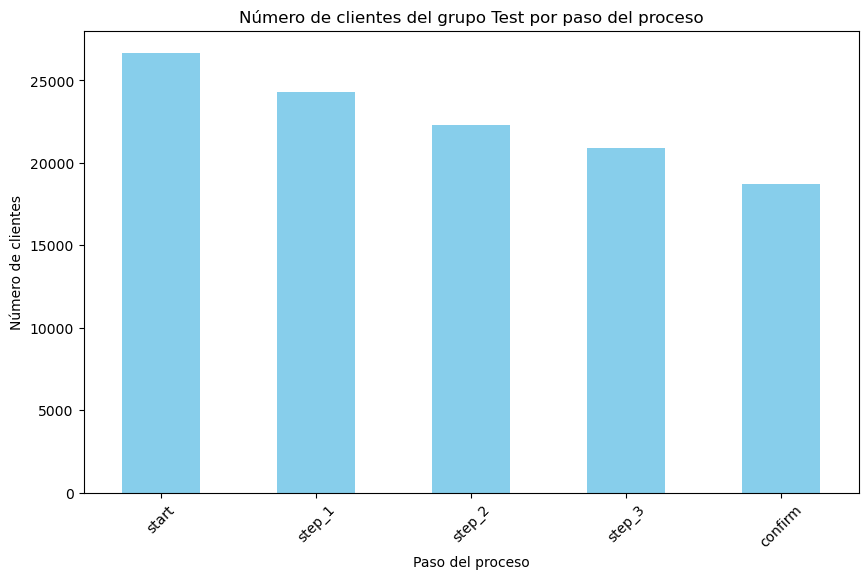

In [ ]:
# grupo test - steps del proceso digital
# Contar la cantidad de clientes únicos que han realizado cada paso del proceso
process_step_counts= df_client_test_digital.groupby('process_step')['client_id'].nunique()

# Ordenar los pasos del proceso para asegurar el orden en el gráfico
process_step_counts = process_step_counts.reindex(['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
process_step_counts.plot(kind='bar', color='skyblue')
plt.title('Número de clientes del grupo Test por paso del proceso')
plt.xlabel('Paso del proceso')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.show()

### Crear un dataframe grupo Control:

In [ ]:
# Unir los clientes de tipo control con el dataframe que recoge sus actuvidades digitales
# Join clients that belong to Test Variation to their digital footprints
client_id_control_digital = pd.merge(client_id_control, concat_df, on='client_id', how='inner')
client_id_control_digital

,client_id,visitor_id,visit_id,process_step,date_time
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43
...,...,...,...,...,...
143457,393005,238199953_33257685972,579367767_60788307935_908431,start,2017-03-29 15:25:20
143458,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17
143459,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31
143460,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23


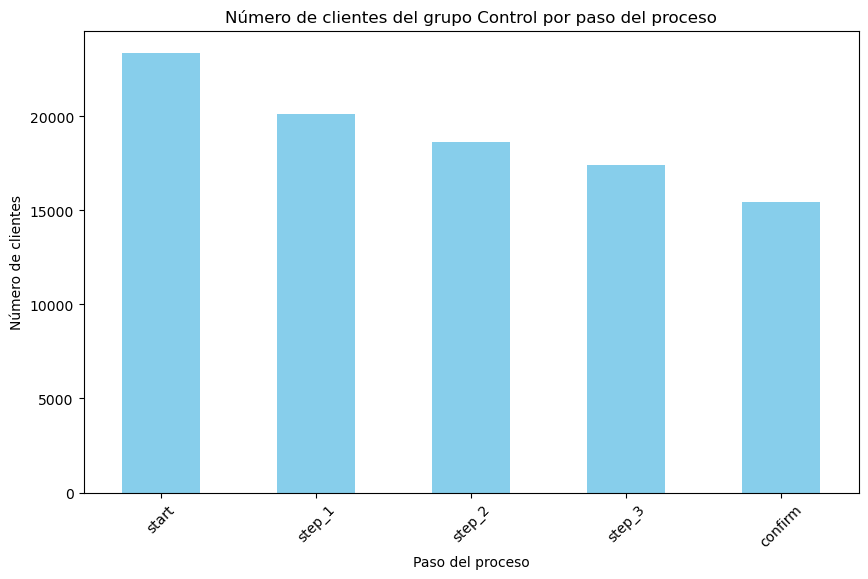

In [ ]:
# Grupo Control por cada uno de los steps del proceso digital Bar Chart
# Contar la cantidad de clientes únicos que han realizado cada paso del proceso
process_step_counts = client_id_control_digital.groupby('process_step')['client_id'].nunique()

# Ordenar los pasos del proceso para asegurar el orden en el gráfico
process_step_counts  = process_step_counts.reindex(['start', 'step_1', 'step_2', 'step_3', 'confirm'])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
process_step_counts.plot(kind='bar', color='skyblue')
plt.title('Número de clientes del grupo Control por paso del proceso')
plt.xlabel('Paso del proceso')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.show()

### Uso de la web- frecuencia de conexión

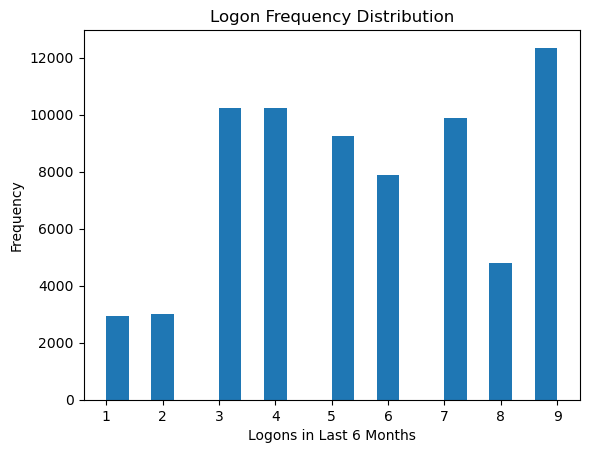

In [ ]:
plt.hist(clean_demo['logons_6_mnth'], bins=20)
plt.xlabel('Logons in Last 6 Months')
plt.ylabel('Frequency')
plt.title('Logon Frequency Distribution')
plt.show()

### Análisis de cuentas y balances


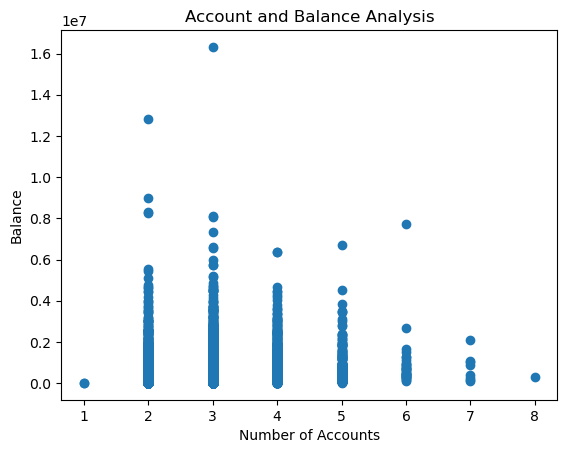

In [ ]:
plt.scatter(clean_demo['n_accounts'], clean_demo['balance'])
plt.xlabel('Number of Accounts')
plt.ylabel('Balance')
plt.title('Account and Balance Analysis')
plt.show()

### Canal de comunicación en funcion de la edad

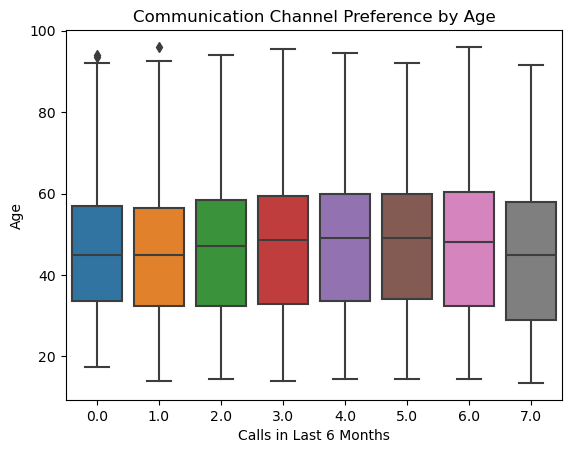

In [ ]:
sns.boxplot(x='calls_6_mnth', y='age', data=clean_demo)
plt.xlabel('Calls in Last 6 Months')
plt.ylabel('Age')
plt.title('Communication Channel Preference by Age')
plt.show()

### Communication - Nº de la sesión

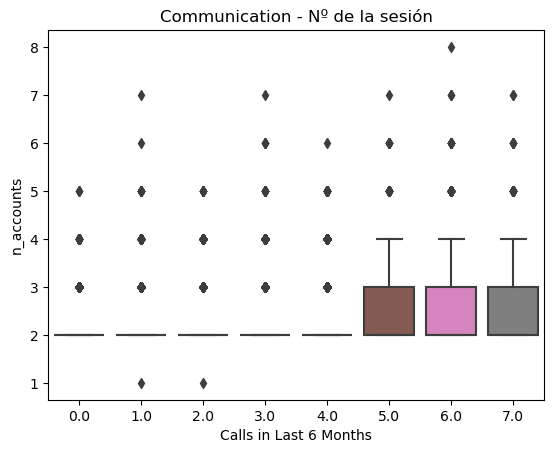

In [ ]:
sns.boxplot(x='calls_6_mnth', y='n_accounts', data=clean_demo)
plt.xlabel('Calls in Last 6 Months')
plt.ylabel('n_accounts')
plt.title('Communication - Nº de la sesión')
plt.show()


### Análisis de la edad y y los gastos /balance

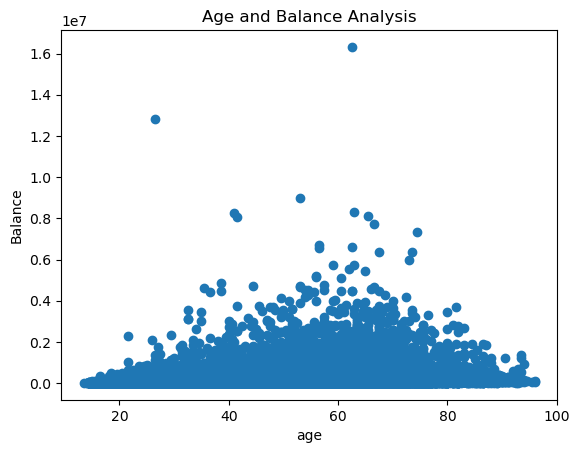

In [ ]:
plt.scatter(clean_demo['age'], clean_demo['balance'])
plt.xlabel('age')
plt.ylabel('Balance')
plt.title('Age and Balance Analysis')
plt.show()

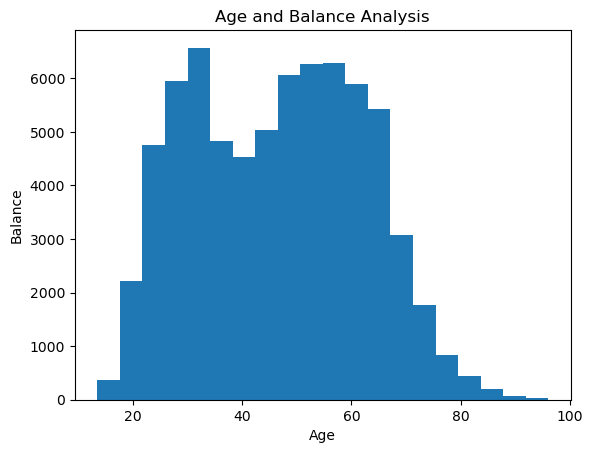

In [ ]:

plt.hist(clean_demo['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age and Balance Analysis')
plt.show()

In [ ]:
concat_df.columns


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

# KPI's

### Completion Rate

In [ ]:
old_completion_rate = len(client_id_control_digital[client_id_control_digital['process_step'] == 'confirm']) / len(client_id_control_digital)
new_completion_rate = len(df_client_test_digital[df_client_test_digital['process_step'] == 'confirm']) / len(df_client_test_digital)

print("Old Design Performance:")
print("Completion Rate:", old_completion_rate)
print("\nNew Design Performance:")
print("Completion Rate:", new_completion_rate)

Old Design Performance:
Completion Rate: 0.12201837420362187

New Design Performance:
Completion Rate: 0.1446299347191687


### Time Spent on Each Step

#### paso previo

In [ ]:
df_client_test_digital['date_time'] = pd.to_datetime(df_client_test_digital['date_time'])
client_id_control_digital['date_time'] = pd.to_datetime(client_id_control_digital['date_time'])


In [ ]:
# Ordenar correctamente el DataFrame
df_client_test_digital.sort_values(by=['client_id', 'visit_id', 'date_time'], inplace=True)
df_client_test_digital

# Calcular el tiempo pasado entre process_step consecutivos
df_client_test_digital['time_spent'] = df_client_test_digital.groupby(['client_id','visit_id'])['date_time'].diff()

# Extraer días y tiempo separadamente
df_client_test_digital['date_spent'] = df_client_test_digital['time_spent'].dt.days.fillna(0).astype(int)
df_client_test_digital['time_spent'] = df_client_test_digital['time_spent'].apply(lambda x: pd.Timedelta(seconds=x.total_seconds() % 86400) if pd.notnull(x) else pd.Timedelta(seconds=0))

# Ajustar días negativos a cero
df_client_test_digital['date_spent'] = df_client_test_digital['date_spent'].apply(lambda x: max(x, 0))
df_client_test_digital


,client_id,visitor_id,visit_id,process_step,date_time,time_spent,date_spent
52161,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,0 days 00:00:00,0
52160,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,0 days 00:00:07,0
52159,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,0 days 00:00:32,0
52158,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,0 days 00:01:39,0
52157,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,0 days 00:00:20,0
...,...,...,...,...,...,...,...
77449,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,0 days 00:00:21,0
77444,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,0 days 00:00:00,0
77443,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,0 days 00:00:15,0
8318,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,0 days 00:00:00,0


In [ ]:
# Ordenar correctamente el DataFrame
client_id_control_digital.sort_values(by=['client_id', 'visit_id', 'date_time'], inplace=True)
client_id_control_digital

# Calcular el tiempo pasado entre process_step consecutivos
client_id_control_digital['time_spent'] = client_id_control_digital.groupby(['client_id','visit_id'])['date_time'].diff()

# Extraer días y tiempo separadamente
client_id_control_digital['date_spent'] = client_id_control_digital['time_spent'].dt.days.fillna(0).astype(int)
client_id_control_digital['time_spent'] = client_id_control_digital['time_spent'].apply(lambda x: pd.Timedelta(seconds=x.total_seconds() % 86400) if pd.notnull(x) else pd.Timedelta(seconds=0))

# Ajustar días negativos a cero
client_id_control_digital['date_spent'] = client_id_control_digital['date_spent'].apply(lambda x: max(x, 0))
client_id_control_digital


,client_id,visitor_id,visit_id,process_step,date_time,time_spent,date_spent
77582,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,0 days 00:00:00,0
77581,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,0 days 00:00:49,0
77580,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,0 days 00:01:03,0
77579,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,0 days 00:00:09,0
77578,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,0 days 00:04:35,0
...,...,...,...,...,...,...,...
69747,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:30:25,0 days 00:00:14,0
69744,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,0 days 00:07:03,0
69745,9998346,292425655_16607136645,189177304_69869411700_783154,confirm,2017-03-29 15:37:28,0 days 00:00:00,0
69746,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,0 days 00:00:00,0


In [ ]:
df_client_test_digital.columns


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'time_spent', 'date_spent'],
      dtype='object')

In [ ]:
client_id_control_digital.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'time_spent', 'date_spent'],
      dtype='object')

#### Time spend on each step

In [ ]:
old_avg_time_per_step = client_id_control_digital.groupby('process_step')['time_spent'].mean()
new_avg_time_per_step = df_client_test_digital.groupby('process_step')['time_spent'].mean()

print("Old Design Performance:")
print("Average Time per Step:", old_avg_time_per_step)
print("\nNew Design Performance:")
print("Average Time per Step:", new_avg_time_per_step)

Old Design Performance:
Average Time per Step: process_step
confirm   0 days 00:02:03.049185946
start     0 days 00:00:53.099563098
step_1    0 days 00:00:42.585681542
step_2    0 days 00:00:38.497566252
step_3    0 days 00:01:32.238868172
Name: time_spent, dtype: timedelta64[ns]

New Design Performance:
Average Time per Step: process_step
confirm   0 days 00:01:51.798615970
start     0 days 00:01:01.011881573
step_1    0 days 00:00:37.395093891
step_2    0 days 00:00:47.866016973
step_3    0 days 00:01:35.848574959
Name: time_spent, dtype: timedelta64[ns]


### Error Rates

In [293]:
# Definir el mapeo de pasos
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}

# Función para calcular el error rate general
def calculate_error_rate(df):
    df = df.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])
    df['step_numeric'] = df['process_step'].map(step_mapping)
    df['previous_step_numeric'] = df.groupby(['client_id', 'visitor_id', 'visit_id'])['step_numeric'].shift(1)
    df['backstep'] = df['step_numeric'] < df['previous_step_numeric']
    
    backsteps_count = df['backstep'].sum()
    total_steps = len(df)
    error_rate = backsteps_count / total_steps * 100 if total_steps > 0 else 0
    
    return error_rate

# Calcular el error rate general
error_rate_general = calculate_error_rate(df_client_test_digital)

# Imprimir el resultado
print(f"Error Rate: {error_rate_general:.2f}%")

Error Rate: 9.14%


In [294]:
# Definir el mapeo de pasos
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}

# Función para calcular el error rate general
def calculate_error_rate(df):
    df = df.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])
    df['step_numeric'] = df['process_step'].map(step_mapping)
    df['previous_step_numeric'] = df.groupby(['client_id', 'visitor_id', 'visit_id'])['step_numeric'].shift(1)
    df['backstep'] = df['step_numeric'] < df['previous_step_numeric']
    
    backsteps_count = df['backstep'].sum()
    total_steps = len(df)
    error_rate = backsteps_count / total_steps * 100 if total_steps > 0 else 0
    
    return error_rate

# Calcular el error rate general
error_rate_general = calculate_error_rate(client_id_control_digital)

# Imprimir el resultado
print(f"Error Rate: {error_rate_general:.2f}%")

Error Rate: 6.70%


# Hypothesis

In [ ]:
test_confirm_clients = len(df_client_test_digital[df_client_test_digital['process_step'] == 'confirm']) 
total_test_users = len(df_client_test_digital)
control_confirm_clients = len(client_id_control_digital[client_id_control_digital['process_step'] == 'confirm'])
total_control_users = len(client_id_control_digital)

## Confirm - confirm

Null Hypothesis (H0): La tasa de "confirm" del grupo de prueba (nuevo diseño) es igual a la tasa de "confirm" del grupo de control (diseño antiguo).
Alternative Hypothesis (H1)La tasa de "confirm" del grupo de prueba (nuevo diseño) NO es igual a la tasa de "confirm" del grupo de control (diseño antiguo).



In [295]:
# Number of completions and total users in Test group
test_completions = test_confirm_clients 
total_test_users = total_test_users = len(df_client_test_digital)


# Number of completions and total users in Control group
control_completions = control_confirm_clients
total_control_users = total_control_users = len(client_id_control_digital)


# Perform the two-proportion z-test
z_score, p_value = sm.stats.proportions_ztest([test_completions, control_completions], [total_test_users, total_control_users], alternative='two-sided')

# Interpret the results
alpha = 0.05  # Significance level
print("Z Score:", z_score)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the completion rates for the Test and Control groups are different.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the completion rates for the Test and Control groups are different.")

Z Score: 18.67324116863663
P-value: 8.173840595991908e-78
Reject the null hypothesis. There is evidence to suggest that the completion rates for the Test and Control groups are different.


## Confirm Rate - Cost-Effectiveness Threshold

In [297]:
# Calculate the completetion rate for the control grupo increased by 5%
control_completion_rate_with_threshold = old_completion_rate + 0.05

# Perform the two-proportion z-test
z_score, p_value = sm.stats.proportions_ztest([test_completions, control_completions], [total_test_users, total_control_users], alternative='larger')

# Interpret the results
alpha = 0.05  # Significance level
print("Z Score:", z_score)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the completion rates for the Test group is greater than completion rates for the Control Group.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the completion rates for the Test group is greater than completion rates for the Control Group.")


Z Score: 18.67324116863663
P-value: 4.086920297995954e-78
Reject the null hypothesis. There is evidence to suggest that the completion rates for the Test group is greater than completion rates for the Control Group.


## Edad media - interactuación

Hipótesis Nula (H0): La edad promedio de los clientes que interactúan con el nuevo proceso es igual a la edad promedio de los clientes que interactúan con el proceso anterior.
Hipótesis Alternativa (H1): La edad promedio de los clientes que interactúan con el nuevo proceso es diferente de la edad promedio de los clientes que interactúan con el proceso anterior.

In [ ]:
test_age= clean_merged_test['age']
control_age= clean_merged_control['age']

In [ ]:
# Prueba de hipótesis para la edad (prueba t de Student)
t_statistic_age, p_value_age = stats.ttest_ind(test_age, control_age)

# Interpretar los resultados
alpha = 0.05

print("Prueba de hipótesis para la edad:")
print("Estadístico de prueba (t):", t_statistic_age)
print("Valor p:", p_value_age)
if p_value_age < alpha:
    print("Rechazamos la hipótesis nula. Hay diferencias significativas en la edad entre los grupos.")
else:
    print("No podemos rechazar la hipótesis nula. No hay diferencias significativas en la edad entre los grupos.")


Prueba de hipótesis para la edad:
Estadístico de prueba (t): -11.061642390831715
Valor p: 1.9688444849801064e-28
Rechazamos la hipótesis nula. Hay diferencias significativas en la edad entre los grupos.


## Edad promedio - antiguedad

In [ ]:
test_since = clean_merged_test['since_years']


In [ ]:
control_since =clean_merged_control['since_years']

Hipótesis Nula (H0): La antigüedad promedio de los clientes que interactúan con el nuevo proceso es igual a la antigüedad promedio de los clientes que interactúan con el proceso anterior.
Hipótesis Alternativa (H1): La antigüedad promedio de los clientes que interactúan con el nuevo proceso es diferente de la antigüedad promedio de los clientes que interactúan con el proceso anterior.

In [ ]:
# Prueba de hipótesis para la antigüedad del cliente (prueba t de Student)
t_statistic_since, p_value_since = stats.ttest_ind(test_since, control_since)

# Interpretar los resultados
alpha = 0.05


print("\nPrueba de hipótesis para la antigüedad del cliente:")
print("Estadístico de prueba (t):", t_statistic_since)
print("Valor p:", p_value_since)
if p_value_since < alpha:
    print("Rechazamos la hipótesis nula. Hay diferencias significativas en la antigüedad del cliente entre los grupos.")
else:
    print("No podemos rechazar la hipótesis nula. No hay diferencias significativas en la antigüedad del cliente entre los grupos.")


Prueba de hipótesis para la antigüedad del cliente:
Estadístico de prueba (t): -4.092016541740033
Valor p: 4.278347125604244e-05
Rechazamos la hipótesis nula. Hay diferencias significativas en la antigüedad del cliente entre los grupos.


## Género-proceso

In [289]:
test_gender=clean_merged_test['gender']
control_gender=clean_merged_control['gender']

Hipótesis Nula (H0): No hay diferencias en la proporción de género entre los clientes que interactúan con el nuevo proceso y los que interactúan con el proceso anterior.
Hipótesis Alternativa (H1): Hay diferencias en la proporción de género entre los clientes que interactúan con el nuevo proceso y los que interactúan con el proceso anterior.

In [290]:
contingency_table = pd.crosstab(test_gender,control_gender)

In [292]:
# Prueba de hipótesis para el género (prueba de chi-cuadrado)
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpretar los resultados
alpha = 0.05


print("\nPrueba de hipótesis para el género:")
print("Estadístico de prueba (chi-cuadrado):", chi2_statistic_gender)
print("Valor p:", p_value_gender)
if p_value_gender < alpha:
    print("Rechazamos la hipótesis nula. Hay diferencias significativas en el género entre los grupos.")
else:
    print("No podemos rechazar la hipótesis nula. No hay diferencias significativas en el género entre los grupos.")


Prueba de hipótesis para el género:
Estadístico de prueba (chi-cuadrado): 10.238101312941115
Valor p: 0.036602318504244856
Rechazamos la hipótesis nula. Hay diferencias significativas en el género entre los grupos.
